# Producing Hessian system

In [1]:
import sympy as sp
Q,A,ωD=sp.symbols('Q A ωD')
θ = sp.Function(r"\theta")(Q,A,ωD)
ω = sp.Function("\omega")(Q,A,ωD)
φ = sp.Function(r"\varphi")(Q,A,ωD)
dθ = ω
dω = -ω/Q-sp.sin(θ)+A*sp.cos(φ)
dφ = ωD
lista_parametara = [A,Q,ωD]
N_P = len(lista_parametara)
lista_funkcija = [θ, ω,φ]
lista_jednadzbi  = [dθ,dω,dφ]
lista_derivacija = [[p] for p in lista_parametara]+[[lista_parametara[i],lista_parametara[j]] for i in range(N_P) for j in range(i,N_P)]

sp.init_printing()
lista = []
i = 0
for f in lista_funkcija:
    lista.append([str(f),'y[%d]'%i])
    i+=1

for a in lista_derivacija:
    for f in lista_funkcija:
        lista.append([str(sp.Derivative(f,*a,evaluate=True)),'y[%d]'%i])
        i+=1

for k in ['cos','sin']:
    lista.append([k,"np."+k])
def zamjena(string, repl):
    st = string
    for r in repl[::-1]:
        st = st.replace(*r)
    return st
i = 0
for f in lista_jednadzbi:
    print(zamjena(str(f),lista),end=',')
    i+=1
print()
for a in lista_derivacija:
    for f in lista_jednadzbi:
        print(zamjena(str(sp.Derivative(f,*a,evaluate=True)),lista),end=',')
        i+=1
    print(" #",str(a))
Q,A,ωD=sp.symbols('Q A \omega_D')
θ = sp.Function(r"\theta")(Q,A,ωD)
ω = sp.Function("\omega")(Q,A,ωD)
φ = sp.Function(r"\varphi")(Q,A,ωD)
dθ = ω
dω = -ω/Q-sp.sin(θ)+A*sp.cos(φ)
dφ = ωD
lista_parametara = [A,Q,ωD]
N_P = len(lista_parametara)
lista_funkcija = [θ, ω,φ]
lista_jednadzbi  = [dθ,dω,dφ]
lista_derivacija = [[p] for p in lista_parametara]+[[lista_parametara[i],lista_parametara[j]] for i in range(N_P) for j in range(i,N_P)]

print()
print()
for a in lista_derivacija:
    for i in range(len(lista_jednadzbi)):
        f = lista_jednadzbi[i]
        lhs = r"\frac{\dif}{\dif t}" +sp.latex(sp.Derivative(lista_funkcija[i],*a,evaluate=True))
        string = lhs+"&="+sp.latex(sp.Derivative(f,*a,evaluate=True))+r"\\"
        print(zamjena(string,[[r"{\left (Q,A,\omega_D \right )}",""]]))

y[1],A*np.cos(y[2]) - np.sin(y[0]) - y[1]/Q,ωD,
y[4],-A*np.sin(y[2])*y[5] - np.cos(y[0])*y[3] + np.cos(y[2]) - y[4]/Q,0, # [A]
y[7],-A*np.sin(y[2])*y[8] - np.cos(y[0])*y[6] - y[7]/Q + y[1]/Q**2,0, # [Q]
y[10],-A*np.sin(y[2])*y[11] - np.cos(y[0])*y[9] - y[10]/Q,1, # [ωD]
y[13],-A*np.sin(y[2])*y[14] - A*np.cos(y[2])*y[5]**2 + np.sin(y[0])*y[3]**2 - 2*np.sin(y[2])*y[5] - np.cos(y[0])*y[12] - y[13]/Q,0, # [A, A]
y[16],-A*np.sin(y[2])*y[17] - A*np.cos(y[2])*y[5]*y[8] + np.sin(y[0])*y[3]*y[6] - np.sin(y[2])*y[8] - np.cos(y[0])*y[15] - y[16]/Q + y[4]/Q**2,0, # [A, Q]
y[19],-A*np.sin(y[2])*y[20] - A*np.cos(y[2])*y[5]*y[11] + np.sin(y[0])*y[3]*y[9] - np.sin(y[2])*y[11] - np.cos(y[0])*y[18] - y[19]/Q,0, # [A, ωD]
y[22],-A*np.sin(y[2])*y[23] - A*np.cos(y[2])*y[8]**2 + np.sin(y[0])*y[6]**2 - np.cos(y[0])*y[21] - y[22]/Q + 2*y[7]/Q**2 - 2*y[1]/Q**3,0, # [Q, Q]
y[25],-A*np.sin(y[2])*y[26] - A*np.cos(y[2])*y[8]*y[11] + np.sin(y[0])*y[6]*y[9] - np.cos(y[0])*y[24] - y[25]/Q + y[10]/Q**2,0, # [Q, ωD]
y[

# Solving ODEs

/home/ktisanic/anaconda3/lib/python3.5/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/home/ktisanic/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/home/ktisanic/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/home/ktisanic/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
/home/ktisanic/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
/home/ktisanic/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/ktisanic/anaconda3/lib/python3.5/site-p

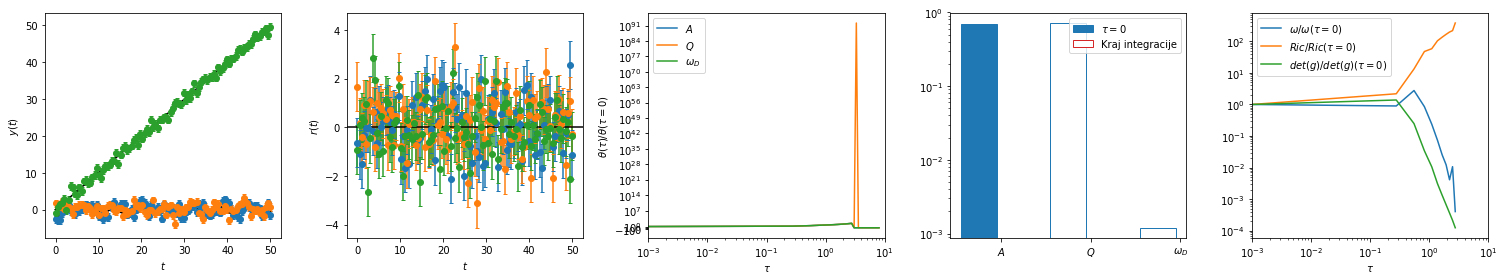

In [7]:
%run "MBAM_codes.py"
class model(MBAM_odeint):
    def __init__(self,**odeint_kwargs):
        self.IC     = [-2,0,0]
        self.INI    = np.array(self.IC+27*[0.])
        self.T      = np.linspace(0,50,100)
        self.xlim   = [0.001,2]
        self.ylim   = [0.001,2]
        self.θbf    = [1.,1.,1.]
        self._title = r'Pendulum_3D/pendulum'
        self.N_parameters = 3
        self.N_equations  = 3
        MBAM_odeint.__init__(self, self._function, self.T, 
                             self.INI,self.N_parameters, 
                             self.N_equations,**odeint_kwargs)
    def _function(self,y,t,θ):
        A,Q,ωD = θ
        return np.array([y[1],A*np.cos(y[2]) - np.sin(y[0]) - y[1]/Q,ωD,
                    y[4],-A*np.sin(y[2])*y[5] - np.cos(y[0])*y[3] + np.cos(y[2]) - y[4]/Q,0, # [A]
                    y[7],-A*np.sin(y[2])*y[8] - np.cos(y[0])*y[6] - y[7]/Q + y[1]/Q**2,0, # [Q]
                    y[10],-A*np.sin(y[2])*y[11] - np.cos(y[0])*y[9] - y[10]/Q,1, # [ωD]
                    y[13],-A*np.sin(y[2])*y[14] - A*np.cos(y[2])*y[5]**2 + np.sin(y[0])*y[3]**2 - 2*np.sin(y[2])*y[5] - np.cos(y[0])*y[12] - y[13]/Q,0, # [A, A]
                    y[16],-A*np.sin(y[2])*y[17] - A*np.cos(y[2])*y[5]*y[8] + np.sin(y[0])*y[3]*y[6] - np.sin(y[2])*y[8] - np.cos(y[0])*y[15] - y[16]/Q + y[4]/Q**2,0, # [A, Q]
                    y[19],-A*np.sin(y[2])*y[20] - A*np.cos(y[2])*y[5]*y[11] + np.sin(y[0])*y[3]*y[9] - np.sin(y[2])*y[11] - np.cos(y[0])*y[18] - y[19]/Q,0, # [A, ωD]
                    y[22],-A*np.sin(y[2])*y[23] - A*np.cos(y[2])*y[8]**2 + np.sin(y[0])*y[6]**2 - np.cos(y[0])*y[21] - y[22]/Q + 2*y[7]/Q**2 - 2*y[1]/Q**3,0, # [Q, Q]
                    y[25],-A*np.sin(y[2])*y[26] - A*np.cos(y[2])*y[8]*y[11] + np.sin(y[0])*y[6]*y[9] - np.cos(y[0])*y[24] - y[25]/Q + y[10]/Q**2,0, # [Q, ωD]
                    y[28],-A*np.sin(y[2])*y[29] - A*np.cos(y[2])*y[11]**2 + np.sin(y[0])*y[9]**2 - np.cos(y[0])*y[27] - y[28]/Q,0, # [ωD, ωD]
                     ])
    def simulate(self):
        y, _, g, _, _, _ = self.find_solutions(self.θbf)
        V0               = self.metric_eigenvector(g)
        init = np.append(self.θbf,V0)
        ys  =y+np.random.normal(0,1,self.N_equations*self.T.size).reshape(self.T.size,self.N_equations)
        r = ys-y
        self._ys = ys
        self._y  = y
        self._rs = r
        self.init = init
        self._V0  = V0
M = model()
M.simulate()

τ=np.linspace(0.001,8,30)#np.append(np.append(np.logspace(-2,np.log10(70),10),np.arange(70,85.5,.5)),np.arange(85.5,100,.1))
MBAM = M.run_MBAM(M.init, τ)


f,ax = plt.subplots(1,5,figsize=(5*4+1,4))
plabels=['$A$','$Q$',r'$\omega_D$']
M.plot_data(ax[:2],M.T,M._ys,M._rs,M._y)
M.bar_plot(ax[3],M._V0,M.metric_eigenvector(MBAM.g[-1]),plabels=plabels,
                      labels=[r'$\tau=0$','Kraj integracije'],colors=['C0','C3'])

for u in range(len(plabels)):
    ax[2].plot(MBAM.τ,MBAM.θ[:,u]/MBAM.θ[0,u],label=plabels[u])

ax[4].plot(MBAM.τ,MBAM.ω0/MBAM.ω0[0],label=r'$\omega/\omega(\tau=0)$')
ax[4].plot(MBAM.τ,MBAM.R/MBAM.R[0],label=r'$Ric/Ric(\tau=0)$')
ax[4].plot(MBAM.τ,MBAM.detg/MBAM.detg[0],label=r'$det(g)/det(g)(\tau=0)$')

ax[2].legend()
ax[2].set_ylabel(r'$\theta(\tau)/\theta(\tau=0)$')
ax[2].set_xscale('log')
ax[2].set_yscale('symlog')
ax[4].set_xscale('log')
ax[4].set_yscale('log')
ax[4].set_xlabel(r'$\tau$')
ax[2].set_xlabel(r'$\tau$')
ax[2].set_xlim(0,10)
ax[4].set_xlim(0,10)
ax[4].legend()
f.tight_layout()
f.savefig(M._title+'_model_full.pdf')

/home/ktisanic/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


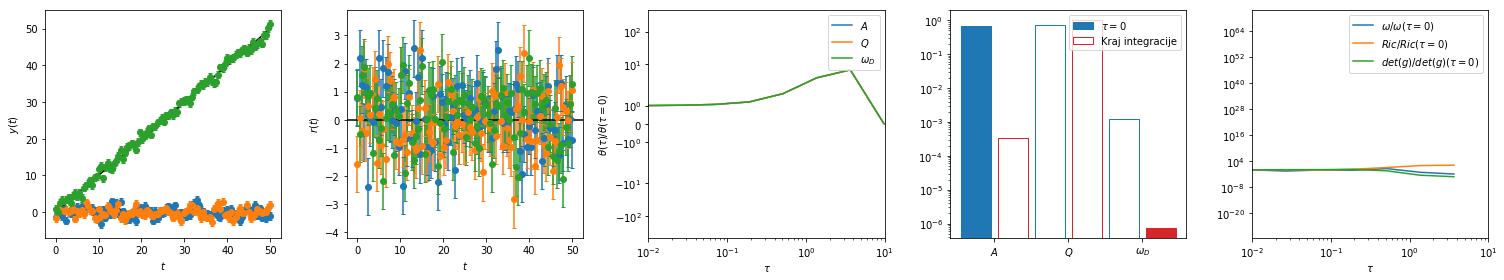

In [6]:
f,ax = plt.subplots(1,5,figsize=(5*4+1,4))
plabels=['$A$','$Q$',r'$\omega_D$']
M.plot_data(ax[:2],M.T,M._ys,M._rs,M._y)
M.bar_plot(ax[3],M._V0,M.metric_eigenvector(MBAM.g[-1]),plabels=plabels,
                      labels=[r'$\tau=0$','Kraj integracije'],colors=['C0','C3'])

for u in range(len(plabels)):
    ax[2].plot(MBAM.τ,MBAM.θ[:,u]/MBAM.θ[0,u],label=plabels[u])

ax[4].plot(MBAM.τ,MBAM.ω0/MBAM.ω0[0],label=r'$\omega/\omega(\tau=0)$')
ax[4].plot(MBAM.τ,MBAM.R/MBAM.R[0],label=r'$Ric/Ric(\tau=0)$')
ax[4].plot(MBAM.τ,MBAM.detg/MBAM.detg[0],label=r'$det(g)/det(g)(\tau=0)$')

ax[2].legend()
ax[2].set_ylabel(r'$\theta(\tau)/\theta(\tau=0)$')
ax[2].set_xscale('log')
ax[2].set_yscale('symlog')
ax[4].set_xscale('log')
ax[4].set_yscale('log')
ax[4].set_xlabel(r'$\tau$')
ax[2].set_xlabel(r'$\tau$')
ax[2].set_xlim(0,10)
ax[4].set_xlim(0,10)
ax[4].legend()
f.tight_layout()
f.savefig(M._title+'_model_full.pdf')